# 🏘 Boston Housing Dataset 🏘

In [1]:
#it is IMPORTING TIME!
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from scipy import stats
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
sns.set(rc={'figure.figsize':(11.7,8.27)}) #standardize sizing for seaborn plots

# 📝 <span style="color: purple">Load</span> the Boston data!

In [2]:
boston = load_boston()
bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos['PRICE'] = boston.target

# print(bos.head())
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Attribute Information:
*Information taken by calling the ```.DESCR ``` property, like so:*
```python
print(boston.DESCR)
```
1. **CRIM** per capita crime rate by town
1. **ZN** proportion of residential land zoned for lots over 25,000 sq. ft
1. **INDUS** proportion of non-retail business acres per town
1. **CHAS** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
1. **NOX** nitric oxides concentration (parts per 10 million)
1. **RM** average number of rooms per dwelling
1. **AGE** proportion of owner-occupied units built prior to 1940
1. **DIS** weighted distances to five Boston employment centres
1. **RAD** index of accessibility to radial highways
1. **TAX** full-value property-tax rate per \$10,000
1. **PTRATIO** pupil-teacher ratio by town
1. **B** 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
1. **LSTAT** % lower status of the population
1. **PRICE** median value of owner-occupied homes (in \$1000's)

# 📊 Perform some <span style="color: purple">basic exploratory data analysis</span> to get a feel for the data.

### I'm curious to see the impact of <span style="color: purple">NOX</span> and <span style="color: purple">PTRATIO</span> on home prices. And I'm particularly partial to <span style="color: purple">violin plots</span>, so let's use those to visualize.

/Users/cherishkim/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


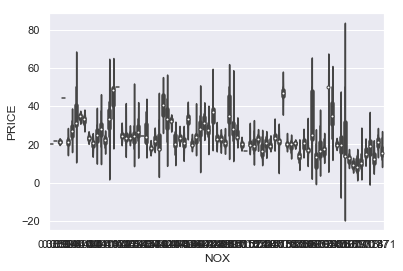

In [3]:
sns.violinplot(x='NOX', y='PRICE', data=bos)

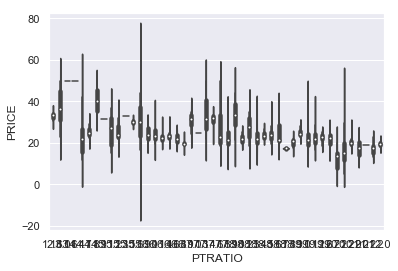

In [4]:
sns.violinplot(x='PTRATIO', y='PRICE', data=bos)

### Higher concentrations of nitric oxide correspond to larger variances in house prices; ditto lower pupil-teacher ratios.

### Let's continue on with linear regression!

# 🔥 Create a <span style="color:red">correlation heatmap</span> to check to see how highly correlated our predictor variables (features) are.
### <span style="color:blue">REMEMBER:</span> highly correlated predictors = BAD 😱

[Text(0.5, 0, 'CRIM'),
 Text(1.5, 0, 'ZN'),
 Text(2.5, 0, 'INDUS'),
 Text(3.5, 0, 'CHAS'),
 Text(4.5, 0, 'NOX'),
 Text(5.5, 0, 'RM'),
 Text(6.5, 0, 'AGE'),
 Text(7.5, 0, 'DIS'),
 Text(8.5, 0, 'RAD'),
 Text(9.5, 0, 'TAX'),
 Text(10.5, 0, 'PTRATIO'),
 Text(11.5, 0, 'B'),
 Text(12.5, 0, 'LSTAT'),
 Text(13.5, 0, 'PRICE')]

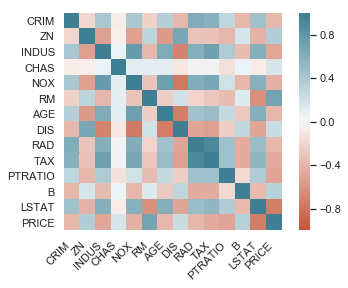

In [5]:
#Credit: https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec

corr = bos.corr()
heat = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
heat.set_xticklabels(
    heat.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

In [6]:
mathy_bones = bos.corr(method='kendall')
mathy_bones

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.462057,0.521014,0.033948,0.603361,-0.211718,0.497297,-0.539878,0.563969,0.544956,0.312768,-0.264378,0.454837,-0.403964
ZN,-0.462057,1.000000,-0.535468,-0.039419,-0.511464,0.278134,-0.429389,0.478524,-0.234663,-0.289911,-0.361607,0.128177,-0.386818,0.339989
INDUS,0.521014,-0.535468,1.000000,0.075889,0.612030,-0.291318,0.489070,-0.565137,0.353967,0.483228,0.336612,-0.192017,0.465980,-0.418430
CHAS,0.033948,-0.039419,0.075889,1.000000,0.056387,0.048080,0.055616,-0.065619,0.021739,-0.037655,-0.115694,-0.033277,-0.041344,0.115202
NOX,0.603361,-0.511464,0.612030,0.056387,1.000000,-0.215633,0.589608,-0.683930,0.434828,0.453258,0.278678,-0.202430,0.452005,-0.394995
RM,-0.211718,0.278134,-0.291318,0.048080,-0.215633,1.000000,-0.187611,0.179801,-0.076569,-0.190532,-0.223194,0.032951,-0.468231,0.482829
AGE,0.497297,-0.429389,0.489070,0.055616,0.589608,-0.187611,1.000000,-0.609836,0.306201,0.360311,0.251857,-0.154056,0.485359,-0.387758
DIS,-0.539878,0.478524,-0.565137,-0.065619,-0.683930,0.179801,-0.609836,1.000000,-0.361892,-0.381988,-0.223486,0.168631,-0.409347,0.313115
RAD,0.563969,-0.234663,0.353967,0.021739,0.434828,-0.076569,0.306201,-0.361892,1.000000,0.558107,0.251913,-0.214364,0.287943,-0.248115
TAX,0.544956,-0.289911,0.483228,-0.037655,0.453258,-0.190532,0.360311,-0.381988,0.558107,1.000000,0.287769,-0.241606,0.384191,-0.414650


# 💻 Train the model. Use 75% of the data for the <span style="color: red">training part</span> and 25% for the <span style="color: red">test part</span>.

### Let's start by working with just a couple features, rather than all of them. I've chosen two features that are not highly correlated with many other features and are only slightly negatively correlated with one another: <span style="color: purple">CRIM</span> and <span style="color: purple">RM</span>.

In [7]:
df = bos.drop(columns=['ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
df.describe()

,CRIM,RM,PRICE
count,506.000000,506.000000,506.000000
mean,3.613524,6.284634,22.532806
std,8.601545,0.702617,9.197104
min,0.006320,3.561000,5.000000
25%,0.082045,5.885500,17.025000
50%,0.256510,6.208500,21.200000
75%,3.677083,6.623500,25.000000
max,88.976200,8.780000,50.000000


### So there are 506 data points in this reduced dataframe. Let's use the first 380 for <span style="color: purple">training</span> and the remaining 126 for <span style="color: purple">testing</span>.

In [8]:
features = ['CRIM', 'RM']
X_train = df[features][:380]
y_train = df.PRICE[:380]
X_test = df[features][-126:]
y_test = df.PRICE[-126:]

### We need to <span style="color: purple">preprocess</span> in order to normalize our features.

In [9]:
X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

### Now we'll instantiate sklearn's <span style="color: purple">LinearRegression()</span> class to obtain the best linear representation.

In [10]:
house_prices = LinearRegression()
house_prices.fit(X_train, y_train)

print('For our first 506 data points:')
print(' * Weight of importance for \'CRIM\' and \'RM\':')
print('   ' + str(house_prices.coef_))
print(' * Y-intercept:')
print('   ' + str(house_prices.intercept_))

For our first 506 data points:
 * Weight of importance for 'CRIM' and 'RM':
   [0.07937084 6.64325937]
 * Y-intercept:
   25.035263157894736


# 🤔 Make predictions on the test set (<span style="color:red">X_test</span>) and see how well it compares to the actual targets from the test set (<span style="color: red">y_test</span>).

In [11]:
predictions = house_prices.predict(X_test)
reality = y_test.values
difference = predictions - reality

print('Predicted prices of last 126 houses using the linear representation obtained above:')
print(house_prices.predict(X_test))
print('')

print('Actual prices of last 126 houses:')
print(y_test.values)
print('')

print('The difference, positive or negative, between predicted price and true price:')
print(abs(difference))

Predicted prices of last 126 houses using the linear representation obtained above:
[36.47530656 31.14954586 19.41408566 19.22170758  5.93696279 16.4556548
  9.25411782 13.2779366  11.83911802 17.71560078 21.45311255 25.36174305
 13.6316363  27.02723417 23.50715291 30.25036798 29.46883544 21.8513571
 18.62032012 23.08153187 24.7338869  28.79839878 29.47874531 17.33645351
 19.54288397 21.45734474  3.2743307  20.26470772 20.34278233 34.70015397
 22.21826508 32.4373761   8.94365951 15.10976196  7.83561333 29.87553999
 33.86786621 16.82136712 24.66610695 34.36039975 29.5685067  24.85006733
 20.72896888 25.97470161 19.74798812 23.62592472 22.92110261 27.2991271
 27.01985635 29.19904203 28.82319203 34.45462692 29.70398869 29.82652301
 27.23154576 32.09609566 30.16738107 26.58966298 24.06543147 20.47017993
 22.75745781 29.50267219 27.31144066 30.41988008 23.12138074 30.12254734
 28.72931705 27.70699174 26.93844577 29.61749641 33.46154261 32.36447492
 28.21232925 40.93595694 33.23424494 30.853

### Our predictions don't seem to compare so well to reality. 😞 Let's compute our model's <span style="color: purple">Mean Square Error</span> and <span style="color: purple">R2 Score</span> to see <span style="color: blue">precisely</span> how our model measures up!

# 🧮 Compute Mean Square Error (<span style="color:red">MSE</span>) and R-Squared (<span style="color:red">R2</span>) Score of the model.

In [12]:
print('Mean Square Error:')
print(mean_squared_error(reality, predictions))
print('')
print('R2 Score:')
print(house_prices.score(X_test, y_test))
print('')
print('Wait, no, that can\'t be right. Let\'s calculate the R2 score another way:')
print(r2_score(y_test, house_prices.predict(X_test)))

Mean Square Error:
151.54996896077986

R2 Score:
-4.226212436812853

Wait, no, that can't be right. Let's calculate the R2 score another way:
-4.226212436812853


### Sadly, this model lacks goodness of fit. <span style="color: blue">The ideal MSE is 0.0</span>, but this model yielded an extremely high MSE. <span style="color: blue">The ideal R2 Score is 1.0</span>. An R2 Score of 0.0 indicates a model always predicting the true value of y, regardless of input... and a <span style="color: blue">negative R2 score indicates an even worse predicting model</span>.

### <span style="color: blue">Adding more predictors</span> can only improve goodness of fit. Let's do just that!

# 🔁 Let's make another model, but this time around, include <span style="color: purple">all</span> the features! All the other steps will remain the same to what we did above.

In [13]:
features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
X_train = bos[features][:380]
y_train = bos.PRICE[:380]
X_test = bos[features][-126:]
y_test = bos.PRICE[-126:]

In [14]:
X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

house_prices = LinearRegression()
house_prices.fit(X_train, y_train)

print('For our first 506 data points:')
print(' * Weight of importance for \'CRIM\' and \'RM\':')
print('   ' + str(house_prices.coef_))
print(' * Y-intercept:')
print('   ' + str(house_prices.intercept_))
print('')

predictions = house_prices.predict(X_test)
reality = y_test.values
difference = predictions - reality

print('Predicted prices of last 126 houses using the linear representation obtained above:')
print(house_prices.predict(X_test))
print('')

print('Actual prices of last 126 houses:')
print(y_test.values)
print('')

print('The difference, positive or negative, between predicted price and true price:')
print(abs(difference))

For our first 506 data points:
 * Weight of importance for 'CRIM' and 'RM':
   [-0.73028783  1.18506854  0.43648036  0.26389326 -1.68244183  3.79645188
 -0.04165396 -2.82967552  3.16721792 -1.57738436 -1.80029465  0.07732184
 -2.81312344]
 * Y-intercept:
   25.035263157894736

Predicted prices of last 126 houses using the linear representation obtained above:
[31.84156217 30.65314791 22.1004137  21.85429058 11.25794993 17.47659756
 13.8716471  14.37470105 14.25019868 21.71498195 24.64630689 25.08420423
 16.80502696 29.47579681 26.70308563 30.73140861 29.67657124 25.17457625
 17.47206534 21.88465762 22.96050935 28.88121987 29.20934381 21.36746694
 18.70259984 21.17210575 15.39786869 30.12882449 24.82396283 35.49599879
 30.82777346 33.19626073 13.42402912 22.77545676  7.01986606 24.2479999
 28.50919683 18.42873477 22.10417201 29.23864835 29.79146693 26.95408108
 27.4819354  26.11866515 25.88168235 22.5465794  28.52692454 28.15763182
 26.23072945 25.98125912 30.91920335 32.92515873 33.393

### Seems like a more accurate model! Let's calculate the <span style="color: purple">MSE</span> and <span style="color: purple">R2 Score</span>.

In [15]:
print('Mean Square Error:')
print(mean_squared_error(reality, predictions))
print('')
print('R2 Score:')
print(house_prices.score(X_test, y_test))
print('')
print('Let\'s calculate the R2 score another way, just to be sure:')
print(r2_score(y_test, house_prices.predict(X_test)))

Mean Square Error:
129.34386929707364

R2 Score:
-3.4604333671675063

Let's calculate the R2 score another way, just to be sure:
-3.4604333671675063


### Well, that's not much better, but it's still an improvement. That tells us that while our original model was not a great fit, using all the features doesn't help that much, either. <span style="color: purple">Choosing the right features to work with</span> seems vital. I did not select features wisely; for future endeavors, I will pay closer attention to potential predictors' correlation with the target.